In [ ]:
import torch
torch.__version__

#Logistic Regression Using Pytorch

## Flow of Program
0. Import Important libraries
1. Get Data Ready (Turn into tensor , Batches)
2. Build a Logistic Regression Model
3. pick a loss function and Optimizer
4. Build a training loop
5. evaluate your model
6. How to improve our model
7. Save your Model

###**0. import Important Libraries**

In [ ]:
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
import matplotlib.pyplot as plt

###**1. Get Data Ready(Turn into tensor , batch)**

In [ ]:
train_dataset = datasets.FashionMNIST(root='./dataset',train=True,transform=transforms.ToTensor(),download=True)
test_dataset = datasets.FashionMNIST(root='./dataset',train=False,transform=transforms.ToTensor())

100%|██████████| 26421880/26421880 [00:02<00:00, 12916882.04it/s]


Extracting ./dataset/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./dataset/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 196892.97it/s]


Extracting ./dataset/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./dataset/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3760454.35it/s]


Extracting ./dataset/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./dataset/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4188608.53it/s]

Extracting ./dataset/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./dataset/FashionMNIST/raw



In [ ]:
train_dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./dataset
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./dataset
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
len(train_dataset),len(test_dataset)

(60000, 10000)

####1.2 converting Data to batches

In [ ]:
batch_size=64

In [ ]:
train_batch_loader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_batch_loader = DataLoader(test_dataset,batch_size=batch_size,shuffle=False)

In [ ]:
len(train_batch_loader),len(test_batch_loader)

(938, 157)

###**2. Build a Logistic Regression Model**

In [ ]:
class LogisticRegression(nn.Module):
  def __init__(self,in_dim,n_class):
    super().__init__()
    self.linear=nn.Linear(in_dim,n_class)

  def forward(self,x):
    x=self.linear(x)
    return x

In [ ]:
model = LogisticRegression(28*28,10)

In [ ]:
model

LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [ ]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0004, -0.0173,  0.0131,  ..., -0.0292,  0.0100, -0.0128],
                      [ 0.0353,  0.0262, -0.0305,  ...,  0.0139, -0.0182,  0.0187],
                      [-0.0085,  0.0061,  0.0324,  ...,  0.0214, -0.0172,  0.0124],
                      ...,
                      [-0.0201,  0.0256, -0.0053,  ..., -0.0017,  0.0090, -0.0131],
                      [ 0.0140, -0.0317,  0.0133,  ..., -0.0068,  0.0255, -0.0355],
                      [ 0.0093,  0.0079, -0.0155,  ..., -0.0193, -0.0300,  0.0002]])),
             ('linear.bias',
              tensor([-0.0135, -0.0009, -0.0089,  0.0223, -0.0335,  0.0278,  0.0286, -0.0337,
                      -0.0200,  0.0205]))])

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
device

'cuda'

In [ ]:
model = model.to(device)

###**3. Pick a loss Function and Optimizer**

In [ ]:
learning_rate=0.001

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [ ]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0004, -0.0173,  0.0131,  ..., -0.0292,  0.0100, -0.0128],
                      [ 0.0353,  0.0262, -0.0305,  ...,  0.0139, -0.0182,  0.0187],
                      [-0.0085,  0.0061,  0.0324,  ...,  0.0214, -0.0172,  0.0124],
                      ...,
                      [-0.0201,  0.0256, -0.0053,  ..., -0.0017,  0.0090, -0.0131],
                      [ 0.0140, -0.0317,  0.0133,  ..., -0.0068,  0.0255, -0.0355],
                      [ 0.0093,  0.0079, -0.0155,  ..., -0.0193, -0.0300,  0.0002]],
                     device='cuda:0')),
             ('linear.bias',
              tensor([-0.0135, -0.0009, -0.0089,  0.0223, -0.0335,  0.0278,  0.0286, -0.0337,
                      -0.0200,  0.0205], device='cuda:0'))])

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0004, -0.0173,  0.0131,  ..., -0.0292,  0.0100, -0.0128],
         [ 0.0353,  0.0262, -0.0305,  ...,  0.0139, -0.0182,  0.0187],
         [-0.0085,  0.0061,  0.0324,  ...,  0.0214, -0.0172,  0.0124],
         ...,
         [-0.0201,  0.0256, -0.0053,  ..., -0.0017,  0.0090, -0.0131],
         [ 0.0140, -0.0317,  0.0133,  ..., -0.0068,  0.0255, -0.0355],
         [ 0.0093,  0.0079, -0.0155,  ..., -0.0193, -0.0300,  0.0002]],
        device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([-0.0135, -0.0009, -0.0089,  0.0223, -0.0335,  0.0278,  0.0286, -0.0337,
         -0.0200,  0.0205], device='cuda:0', requires_grad=True)]

###**4. Build a training loop**

In [ ]:
epochs=6

In [ ]:
#Shape of Image inputs and how it is changing
# image [64,1,28,28] -> [64,784] using img.view(img.size(0),-1)
# out [64,10] -> [64]  using _,pred = torch.max(out,1) so the pred size [64]
# label [64]

In [ ]:
for epoch in range(epochs):
  print('*'*10)
  print(f'Epoch:{epoch+1}')
  since=time.time()
  running_loss=0.0
  running_acc=0.0
  model.train()
  for i , data in enumerate(train_batch_loader,1):
    img,label=data
    img=img.view(img.size(0),-1)
    img=img.to(device)
    label=label.to(device)
    out=model(img)#Forward Pass
    loss=criterion(out,label)
    running_loss+=loss.item()
    _,pred=torch.max(out,1)
    running_acc+=(pred==label).float().mean()
    optimizer.zero_grad()
    loss.backward()#Backward loss
    optimizer.step()
    if i % 300 == 0:
      print(f"[{epoch+1}/{epochs}] loss:{running_loss/i:.6f},Accuracy:{running_acc/i:.6f}")

  print(f"Epochs:{epoch+1},loss:{running_loss/i:.6f},Accuracy:{running_acc/i:.6f}")

  model.eval()
  eval_loss=0.0
  eval_acc=0.0
  for data in test_batch_loader:
    img,label=data
    img=img.view(img.size(0),-1)
    img=img.to(device)
    label=label.to(device)
    with torch.no_grad():
      out=model(img)
      loss=criterion(out,label)
    eval_loss+=loss.item()
    _,pred=torch.max(out,1)
    eval_acc+=(pred==label).float().mean()

  print(f"test loss: {eval_loss/len(test_batch_loader):.6f} test Accuracy:{eval_acc/len(test_batch_loader):.6f}")

**********
Epoch:1
[1/6] loss:0.799571,Accuracy:0.749844
[1/6] loss:0.794974,Accuracy:0.753594
[1/6] loss:0.792010,Accuracy:0.753941
Epochs:1,loss:0.790974,Accuracy:0.754414
test loss: 0.792432 test Accuracy:0.742735
**********
Epoch:2
[2/6] loss:0.774431,Accuracy:0.760260
[2/6] loss:0.772465,Accuracy:0.758776
[2/6] loss:0.766136,Accuracy:0.761354
Epochs:2,loss:0.765598,Accuracy:0.761344
test loss: 0.770007 test Accuracy:0.750498
**********
Epoch:3
[3/6] loss:0.748728,Accuracy:0.764896
[3/6] loss:0.749174,Accuracy:0.765208
[3/6] loss:0.745605,Accuracy:0.766580
Epochs:3,loss:0.744732,Accuracy:0.766625
test loss: 0.751589 test Accuracy:0.757166
**********
Epoch:4
[4/6] loss:0.729042,Accuracy:0.773542
[4/6] loss:0.732451,Accuracy:0.771432
[4/6] loss:0.727650,Accuracy:0.772969
Epochs:4,loss:0.726909,Accuracy:0.773071
test loss: 0.735600 test Accuracy:0.760947
**********
Epoch:5
[5/6] loss:0.720598,Accuracy:0.775208
[5/6] loss:0.715916,Accuracy:0.776224
[5/6] loss:0.711930,Accuracy:0.777153

###**5. Evaluate Model**

In [ ]:
test_dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./dataset
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
len(test_batch_loader)

157

In [ ]:
model.eval()
eval_loss=0.0
eval_acc=0.0
for data in test_batch_loader:
  img,label=data
  img=img.view(img.size(0),-1)
  img=img.to(device)
  label=label.to(device)
  with torch.no_grad():
    out=model(img)
    loss=criterion(out,label)
  eval_loss+=loss.item()
  _,pred=torch.max(out,1)
  eval_acc+=(pred==label).float().mean()

print(f"test loss: {eval_loss/len(test_batch_loader):.6f} test Accuracy:{eval_acc/len(test_batch_loader):.6f}")

test loss: 0.820248 test Accuracy:0.737062


5.1 Visualize how model is doing

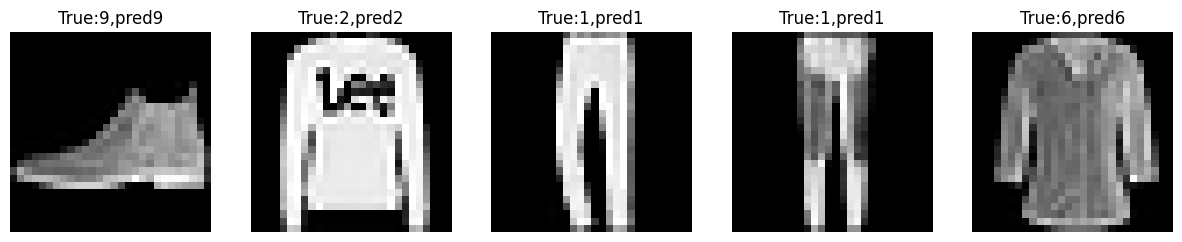

In [ ]:
images,labels=next(iter(test_batch_loader))
images=images.reshape(-1,28*28).to(device)
labels=labels.to(device)
outputs=model(images)
_,predicted=torch.max(outputs,1)
fig,ax=plt.subplots(1,5,figsize=(15,3))
for i in range(5):
  ax[i].imshow(images[i].reshape(28,28).cpu(),cmap='gray')
  ax[i].set_title(f"True:{labels[i].item()},pred{predicted[i].item()}")
  ax[i].axis('off')

###**6. How to improve your model**

change Learninhg rate<br>
add layers <br>
change activation function<br>

###**7. Save the model**

In [ ]:
torch.save(model.state_dict(),'./LogisticRegression.pth')